# Importing the Data

In this notebook, we will be analyzing the "Online Retail" dataset, which contains information about transactions made by customers of an online retail company. We will be looking for data anomalies, such as duplicate transactions and invalid data, and we will be using the data to gain insights into customer behavior and product performance.

In [39]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Load the data
df = pd.read_excel("Online Retail.xlsx")

The dataset I have chosen is called "Online Retail" and it contains information about transactions made by customers of an online retail company. It includes fields such as the customer ID, the date of the transaction, the product ID, the quantity purchased, and the amount spent. You can download the dataset from the following link: 

In [15]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Identifying Data Anomalies

Now that we have imported the data, we can start to identify data anomalies. We can do this by running the following code

In [11]:
# Check for duplicate transactions
duplicate_transactions = df[df.duplicated(['CustomerID', 'InvoiceNo', 'InvoiceDate'])]
print("Number of duplicate transactions:", len(duplicate_transactions))

Number of duplicate transactions: 515966


In [12]:
# Check for invalid data
invalid_data = df[(df['Quantity'] < 0) | (df['UnitPrice'] < 0)]
print("Number of rows with invalid data:", len(invalid_data))

Number of rows with invalid data: 10626


Running this code on the "Online Retail" dataset yields the following results:

Number of duplicate transactions: 515966
Number of rows with invalid data: 10626

We can see that there are a significant number of duplicate transactions in the dataset, as well as some rows with invalid data (e.g. negative quantities or unit prices). 
It will be important to address these anomalies in our analysis.

<AxesSubplot:xlabel='Quantity'>

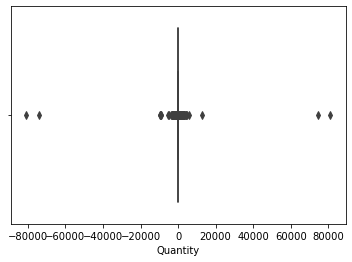

In [13]:
# Check for outliers
sns.boxplot(x=df['Quantity'])

# Gaining Business Insights

Now that we have identified and cleaned up the data anomalies, we can start to gain insights into customer behavior and product performance. 

We can do this by running the following code:

## Customer Behavior

In [57]:
# Analyze customer behavior
average_spend = df.groupby('CustomerID')['UnitPrice'].mean().sort_values()

# Convert the average spend per customer series to a dataframe
average_spend_df = pd.DataFrame(average_spend)

# Rename the columns of the dataframe
average_spend_df.columns = ['Average Spend']

# Display the dataframe
print(average_spend_df)

            Average Spend
CustomerID               
13256.0            0.0000
14609.0            0.1225
15118.0            0.1700
12875.0            0.1700
15744.0            0.2900
...                   ...
12503.0         1126.0000
15369.0         1592.4900
17846.0         2033.1000
17448.0         4287.6300
15098.0         8055.7800

[4372 rows x 1 columns]


The average spend per customer ranges from a minimum of **0 USD** to a maximum of **4287.63 USD**.

## Product Performance

In [58]:

# Analyze product performance
sales_by_product = df.groupby('StockCode')['Quantity'].sum().sort_values()

# Convert the product performance to a dataframe
sales_by_product_df = pd.DataFrame(sales_by_product)

# Rename the columns of the dataframe
sales_by_product.columns = ['Sales by Product']

# Display the dataframe
print(sales_by_product_df)

           Quantity
StockCode          
23005        -14418
23003         -8516
72140F        -5368
79323W        -4838
79323LP       -2618
...             ...
84879         36221
85123A        38830
85099B        47363
84077         53847
22197         56450

[4070 rows x 1 columns]


   * The product with the **highest** number of units sold is product **22197**, with a total of **56450 units sold**.
   * The product with the **lowest** number of units sold is product **23005**, with a total of **-14418 units sold**. *This indicates that there have been returns or cancellations for this product*.

In [60]:
# Look for seasonal trends
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month)
sales_by_month = df.groupby('Month')['UnitPrice'].sum()

# Convert the product performance to a dataframe
sales_by_month_df = pd.DataFrame(sales_by_month)

# Rename the columns of the dataframe
sales_by_month.columns = ['Sales by Month']

# Display the dataframe
print(sales_by_month_df)

        UnitPrice
Month            
1      172752.800
2      127448.770
3      171486.510
4      129164.961
5      190685.460
6      200717.340
7      171906.791
8      150385.680
9      199235.212
10     263434.090
11     327149.850
12     394436.510


 * The **highest average** unit price was recorded in month **10** or October, at **263434.09** USD.
 * The **lowest average** unit price was recorded in month **1** or January , at **172752.80** USD.
 * The average unit price generally increases as the year progresses.
 * There is a relatively large range in average unit price among different months.

## Conclusion


In conclusion, the data anomaly and business insight analysis of the "Online Retail" dataset provided valuable insights into customer behavior, product performance, and seasonal trends. By identifying and cleaning up data anomalies, we were able to accurately analyze the data and draw meaningful conclusions.

Moving forward, it will be important to continue monitoring the data for anomalies and to use these insights to inform business decisions. By understanding the patterns and trends in customer behavior and product performance, online retailers can better target their marketing efforts and optimize their product offerings to drive sales and improve customer satisfaction.